<b>1</b> OBTENCIÓN DE DATOS

In [1]:
import definirCorrelacionVariables
from matplotlib import pyplot
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl

data= definirCorrelacionVariables.getDataFromDataBase()

<b>2</b> pre PROCESAMIENTO DE DATA

In [2]:
dataframe,datos,dictGeneral = definirCorrelacionVariables.generarMatrizDatos(data,True)

VolumenImage : 2.963 
altura : 174.000 
VolumenImage : 2.255 
altura : 184.000 
VolumenImage : 2.666 
altura : 171.000 
VolumenImage : 1.361 
altura : 133.000 
VolumenImage : 1.429 
altura : 168.000 
VolumenImage : 0.827 
altura : 130.000 
VolumenImage : 2.304 
altura : 167.000 
VolumenImage : 1.886 
altura : 186.000 
VolumenImage : 1.133 
altura : 135.000 
VolumenImage : 1.533 
altura : 120.000 
VolumenImage : 0.802 
altura : 135.000 
VolumenImage : 1.124 
altura : 120.000 
VolumenImage : 1.653 
altura : 155.000 
VolumenImage : 1.227 
altura : 120.000 
VolumenImage : 2.347 
altura : 175.000 
VolumenImage : 1.813 
altura : 163.000 
VolumenImage : 1.000 
altura : 140.000 
VolumenImage : 1.200 
altura : 150.000 
VolumenImage : 1.194 
altura : 153.000 
VolumenImage : 3.098 
altura : 195.000 
VolumenImage : 1.144 
altura : 145.000 
VolumenImage : 1.081 
altura : 150.000 
VolumenImage : 0.770 
altura : 149.000 
VolumenImage : 0.845 
altura : 123.000 
VolumenImage : 0.791 
altura : 115.000 


3. OBTENCIÓN DE CORRELACIÓN MÚLTIPLE

GRAFICAS ENTRE VARIABLES

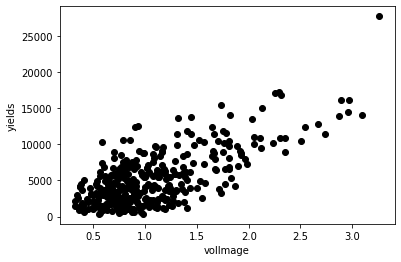

In [3]:
#pyplot.scatter(datos.datosVolumen, datos.datosVolumenCalculado,c="red")
#pyplot.scatter(datos.datosArea, datos.datosAreaCalculada,c="red")
#pyplot.scatter(datos.datosNdvi, datos.datosVolumenCalculado,c="blue")
#pyplot.scatter(datos.datosAltura, datos.datosNdvi,c="green")
pyplot.scatter(dataframe["volImage"],dataframe["yields"],c="black")
pyplot.xlabel("volImage")
pyplot.ylabel("yields")

pyplot.show()

SE CALCULA LA VARIABLE EL IAF
$Ac = \pi*r*g $

$g = \sqrt(h^2 + r^2) $

Se tiene que $r = Di/2$

$Ac = \pi*r*\sqrt(h^2 + r^2)$

$Ac = \pi*\frac{Di}{4}*\sqrt(4*h^2 + Di^2)$

Diametro

$diameter = 2*\sqrt(\frac{area}{\pi})$

In [4]:

import math
areaLateral = []
volumeFromDiameter = []
diametros=[]
for index,x in enumerate(datos.datosArea):
    diametro = 2*math.sqrt(x/math.pi)
    diametros.append(diametro)
    altura= datos.datosAlturaCalculada[index]/100
    valueAreaLateral=diametro*math.sqrt((diametro*diametro)+4*(altura*altura))
    valueVolume = math.pi*diametro*diametro*altura*(1/6)
    volumeFromDiameter.append(valueVolume)
    areaLateral.append(valueAreaLateral)


<b style="color:orange;">LAI CALCULATED FROM EQUATION BASED ON VOLUME and AREA</b>

Se calcula el IAF usando Volumen Imagen y Yield

$IAF =  0.0134 + 2.7791 Vc$

Se calcula IAF usando Area Lateral y Yield

$IAF =  -0.5786 + 0.7896 Alat $


In [5]:

IAF_from_volume = definirCorrelacionVariables.objective(datos.datosVolumenImagen, 2.7791,0.0134)
IAF_from_area = definirCorrelacionVariables.objective(areaLateral, 0.7896,-0.5786)
d = {"latArea":areaLateral, "IAF_VOL":IAF_from_volume, "IAF_AREA":IAF_from_area}
dictGeneral.update(d)
dframeFinal = pd.DataFrame(data=dictGeneral)
pd.options.display.float_format = '{:,.2f}'.format
dataFrameCorrs=dframeFinal.loc[:,["yields","volImage","criMax","latArea","hImage","hMed","tviMin","ndviMax","cgreenviMax","IAF_AREA"]]
dfCors= dataFrameCorrs.corr(method="pearson")
dfCors.round(decimals=3)
print(dfCors)
dfCors.to_latex("CorrelationsTab.tex")

             yields  volImage  criMax  latArea  hImage  hMed  tviMin  ndviMax  \
yields         1.00      0.71    0.63     0.69    0.50  0.58   -0.39     0.55   
volImage       0.71      1.00    0.62     0.99    0.69  0.69   -0.46     0.60   
criMax         0.63      0.62    1.00     0.61    0.40  0.47   -0.65     0.63   
latArea        0.69      0.99    0.61     1.00    0.74  0.72   -0.45     0.58   
hImage         0.50      0.69    0.40     0.74    1.00  0.69   -0.39     0.27   
hMed           0.58      0.69    0.47     0.72    0.69  1.00   -0.35     0.44   
tviMin        -0.39     -0.46   -0.65    -0.45   -0.39 -0.35    1.00    -0.30   
ndviMax        0.55      0.60    0.63     0.58    0.27  0.44   -0.30     1.00   
cgreenviMax    0.60      0.60    0.91     0.60    0.36  0.50   -0.55     0.67   
IAF_AREA       0.69      0.99    0.61     1.00    0.74  0.72   -0.45     0.58   

             cgreenviMax  IAF_AREA  
yields              0.60      0.69  
volImage            0.60      0.99

<h1> USO DE CROSS VAL SCORE </h1>

<b style="color:red;">LINEAR REGRESSION SIMPLE VS MULTIPLE</b>




Non Standard Scaler

REGRESSION MODELS

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.isotonic import IsotonicRegression


dfsX=dframeFinal.loc[:,["volImage"]]
X_multiple= dfsX.values
y_multiple = dframeFinal.yields.values

sc_X = StandardScaler()
sc_y = StandardScaler()
Xvolume = sc_X.fit_transform(X_multiple)
y = sc_y.fit_transform(dframeFinal.yields.values.reshape(-1, 1))


dfsX=dframeFinal.loc[:,["volImage","criMax","ndviMean","maxBlue","latArea","maxGreen","saviMax","tviMax","ndviMax","maxHistBluVal"]]
X_multiple= dfsX.values
sc_X = StandardScaler()
Xmulti = sc_X.fit_transform(X_multiple)

scores = cross_val_score(LinearRegression(),Xvolume ,y , scoring='r2', cv=4)
print( "Linear Regression Simple",scores)
print(np.mean(scores))

scores = cross_val_score(LinearRegression(),Xmulti ,y , scoring='r2', cv=4)
print( "Linear Regression Multiple",scores)
print(np.mean(scores))

scores = cross_val_score(SVR(kernel="linear"),Xvolume ,y.ravel() , scoring='r2', cv=4)
print( "SVR Linear Simple",scores)
print(np.mean(scores))

scores = cross_val_score(SVR(kernel="linear"),Xmulti ,y.ravel() , scoring='r2', cv=4)
print( "SVR Linear Multiple",scores)
print(np.mean(scores))

scores = cross_val_score(RandomForestRegressor(),Xvolume ,y.ravel() , scoring='r2', cv=4)
print("Simple Regressor Random forest  ")
#print(scores)
print(np.mean(scores))

scores = cross_val_score(RandomForestRegressor(),Xmulti ,y.ravel() , scoring='r2', cv=4)
print("Multi Regressor Random Forest ")
#print(scores)
print(np.mean(scores))

scores = cross_val_score(tree.DecisionTreeRegressor(),Xvolume ,y.ravel() , scoring='r2', cv=4)
print("Decision Tree Simple Regressor")
#print(scores)
print(np.mean(scores))

scores = cross_val_score(tree.DecisionTreeRegressor(),Xmulti ,y.ravel() , scoring='r2', cv=4)
print("Decision Tree Multi Regressor ")
#print(scores)
print(np.mean(scores))

scores = cross_val_score(linear_model.SGDRegressor(loss="squared_epsilon_insensitive"),Xvolume ,y.ravel() , scoring='r2', cv=4)
print("SGD Simple Regressor ")
#print(scores)
print(np.mean(scores))

scores = cross_val_score(linear_model.SGDRegressor(loss="squared_epsilon_insensitive"),Xmulti ,y.ravel() , scoring='r2', cv=4)
print("SGD Multi Regressor ")
#print(scores)
print(np.mean(scores))

scores = cross_val_score(ensemble.BaggingRegressor(),Xmulti ,y.ravel() , scoring='r2', cv=4)
print("BaggingRegressor Multi Regressor ")
#print(scores)
print(np.mean(scores))


scores = cross_val_score(ensemble.AdaBoostRegressor(),Xmulti ,y.ravel() , scoring='r2', cv=4)
print("AdaBoostRegressor Multi Regressor ")
#print(scores)
print(np.mean(scores))

scores = cross_val_score(ensemble.ExtraTreesRegressor(),Xmulti ,y.ravel() , scoring='r2', cv=4)
print("ExtraTreesRegressor Multi Regressor ")
#print(scores)
print(np.mean(scores))

Linear Regression Simple [0.5592212  0.55552891 0.45958938 0.33793399]
0.4780683693718535
Linear Regression Multiple [0.61928299 0.67811871 0.5784735  0.38040915]
0.5640710876963615
SVR Linear Simple [0.56392294 0.54299849 0.45472669 0.3391311 ]
0.47519480794152824
SVR Linear Multiple [0.61376303 0.65014896 0.50935009 0.36645747]
0.534929888531848
Simple Regressor Random forest  
0.21951685071705831
Multi Regressor Random Forest 
0.5141280523721043
Decision Tree Simple Regressor
-0.05292267783533561
Decision Tree Multi Regressor 
0.2252963021301735
SGD Simple Regressor 
0.476961620129541
SGD Multi Regressor 
0.5471771088378005
BaggingRegressor Multi Regressor 
0.46440778323559134
AdaBoostRegressor Multi Regressor 
0.4420725026492468
ExtraTreesRegressor Multi Regressor 
0.5126298952936066
